# Starter code for aicssegmentation of UNC_PCNA data
This code is based on the Allen Institute's Cell Segmenter Python code. Please see the [aics-segmentation API Reference](https://github.com/AllenInstitute/aics-segmentation/blob/master/docs/API.md) for details about the functions.  

(NOTE: based on [test_Harvard_Lung.ipynb](test_Harvard_Lung.ipynb) originally written by Jianxu Chen, jxchen01)

In [1]:
import numpy as np
from tifffile import imread, imsave
import cv2
import os

import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

from scipy.ndimage.morphology import distance_transform_edt
import itk

from aicssegmentation.core.visual import blob2dExplorer_single, random_colormap
from aicssegmentation.core.seg_dot import dot_2d
from aicssegmentation.core.utils import hole_filling
from aicssegmentation.core.pre_processing_utils import intensity_normalization, suggest_normalization_param, edge_preserving_smoothing_3d

import javabridge
import bioformats
javabridge.start_vm(class_path=bioformats.JARS)

#### To function properly you will need to correctly define `DATAPATH` as the top directory containing the example (or full) image datasets.
This may need to change once the data are made available across the instances.

In [2]:
DATAPATH = "./seg-image-subsets"

## load one example image
NOTE:`tifffile.imread` and `cv2.imread` functions fails to read the UNC file formats

In [3]:
im_path = os.path.join(DATAPATH,'UNC_PCNA/161124 u2os #5 ncs 6NCS_0_4c1.tif')
im_path

'./seg-image-subsets/UNC_PCNA/161124 u2os #5 ncs 6NCS_0_4c1.tif'

In [4]:
img = bioformats.load_image(im_path)
img.shape

(2048, 2048)

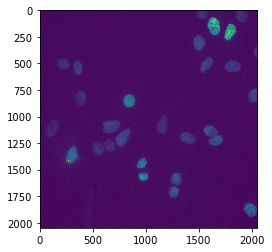

In [5]:
plt.imshow(img)

## pre-processing: intensity normalization and smoothing

In [6]:
suggest_normalization_param(img)

mean intensity of the stack: 0.042312540113925934
the standard deviation of intensity of the stack: 0.05621608346700668
0.9999 percentile of the stack intensity is: 0.7748473882675171
minimum intensity of the stack: 0.0
maximum intensity of the stack: 0.9721611738204956
suggested upper range is 13.5, which is 0.8012296669185162
suggested lower range is 0.5, which is 0.014204498380422592
So, suggested parameter for normalization is [0.5, 13.5]
To further enhance the contrast: You may increase the first value (may loss some dim parts), or decrease the second value(may loss some texture in super bright regions)
To slightly reduce the contrast: You may decrease the first value, or increase the second value


In [7]:
img_norm = intensity_normalization(img, [0.5, 13.5])

intensity normalization: normalize into [mean - 0.5 x std, mean + 13.5 x std] 
intensity normalization completes


In [8]:
img_smooth = edge_preserving_smoothing_3d(img_norm)

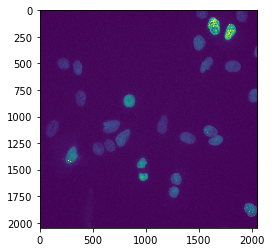

In [9]:
plt.imshow(img_smooth)